# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [103]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
import statsmodels.api as sm

%matplotlib inline

# Load the data into a DataFrame
iowa = pd.read_csv('/Users/colinjclemence/Documents/GA Data Sets/Iowa_Liquor_Sales_reduced.csv')
iowa.head()

,Unnamed: 0,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2493469,02/10/2015,4901,POLK CITY,50226,77.0,Polk,1071100.0,AMERICAN COCKTAILS,55,57129,Chi-Chi's Mexican Mudslide,1750,$6.50,$9.75,6,$58.50,10.5,2.77
1,2104933,04/20/2015,4303,MEDIAPOLIS,52637,29.0,Des Moines,1051140.0,PEACH BRANDIES,434,56206,Paramount Peach Flavored Brandy,750,$5.48,$8.22,2,$16.44,1.5,0.40
2,1875234,05/27/2015,2670,CORALVILLE,52241,52.0,Johnson,1031080.0,VODKA 80 PROOF,434,36304,Hawkeye Vodka,375,$2.07,$3.11,24,$74.64,9.0,2.38
3,1553739,07/20/2015,5102,MOUNT VERNON,52314,57.0,Linn,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,460,903230,Strega Liquore,750,$18.79,$28.19,12,$338.28,9.0,2.38
4,2647492,01/13/2015,2637,DAVENPORT,52804,82.0,Scott,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,434,45275,Paramount White Rum Traveler,750,$4.00,$6.00,12,$72.00,9.0,2.38


In [104]:
iowa.shape

(270955, 19)

In [105]:
#remove Volume Sold (Gallons) because there are two measurements and only one is necessary. 
#keep liter because it is a more precise measurement and is cleanly divisible by Bottle Volume (ml) if needed
del iowa['Unnamed: 0']
del iowa['Volume Sold (Gallons)']
del iowa['Category']
del iowa['County Number']

In [106]:
#check types and that columns were removed
iowa.dtypes

Date                     object
Store Number              int64
City                     object
Zip Code                 object
County                   object
Category Name            object
Vendor Number             int64
Item Number               int64
Item Description         object
Bottle Volume (ml)        int64
State Bottle Cost        object
State Bottle Retail      object
Bottles Sold              int64
Sale (Dollars)           object
Volume Sold (Liters)    float64
dtype: object

In [107]:
#scrub the "$" from Sale (Dollars), State Bottle Retail, and State Bottle Cost and convert them to float64
iowa = iowa.replace({'\$': ''}, regex=True)

In [108]:
#convert object to float64 for Sale (Dollars), State Bottle Retail, and State Bottle Cost 
iowa[["State Bottle Retail", "Sale (Dollars)", "State Bottle Cost"]] = iowa[["State Bottle Retail", "Sale (Dollars)", "State Bottle Cost"]].astype('float64')
iowa.dtypes

Date                     object
Store Number              int64
City                     object
Zip Code                 object
County                   object
Category Name            object
Vendor Number             int64
Item Number               int64
Item Description         object
Bottle Volume (ml)        int64
State Bottle Cost       float64
State Bottle Retail     float64
Bottles Sold              int64
Sale (Dollars)          float64
Volume Sold (Liters)    float64
dtype: object

In [112]:
#convert dates to datetime
iowa['Date'] = pd.to_datetime(iowa['Date'], format="%m/%d/%Y")
iowa.dtypes

Date                    datetime64[ns]
Store Number                     int64
City                            object
Zip Code                        object
County                          object
Category Name                   object
Vendor Number                    int64
Item Number                      int64
Item Description                object
Bottle Volume (ml)               int64
State Bottle Cost              float64
State Bottle Retail            float64
Bottles Sold                     int64
Sale (Dollars)                 float64
Volume Sold (Liters)           float64
dtype: object

In [113]:
#check for null values
iowa.isnull().sum()

Date                    0
Store Number            0
City                    0
Zip Code                0
County                  0
Category Name           0
Vendor Number           0
Item Number             0
Item Description        0
Bottle Volume (ml)      0
State Bottle Cost       0
State Bottle Retail     0
Bottles Sold            0
Sale (Dollars)          0
Volume Sold (Liters)    0
dtype: int64

In [114]:
#remove all null values
iowa = iowa.dropna(axis = 0, how = "any")
iowa.isnull().sum()

Date                    0
Store Number            0
City                    0
Zip Code                0
County                  0
Category Name           0
Vendor Number           0
Item Number             0
Item Description        0
Bottle Volume (ml)      0
State Bottle Cost       0
State Bottle Retail     0
Bottles Sold            0
Sale (Dollars)          0
Volume Sold (Liters)    0
dtype: int64

In [115]:
iowa.head()

,Date,Store Number,City,Zip Code,County,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters)
0,2015-02-10,4901,POLK CITY,50226,Polk,AMERICAN COCKTAILS,55,57129,Chi-Chi's Mexican Mudslide,1750,6.50,9.75,6,58.50,10.5
1,2015-04-20,4303,MEDIAPOLIS,52637,Des Moines,PEACH BRANDIES,434,56206,Paramount Peach Flavored Brandy,750,5.48,8.22,2,16.44,1.5
2,2015-05-27,2670,CORALVILLE,52241,Johnson,VODKA 80 PROOF,434,36304,Hawkeye Vodka,375,2.07,3.11,24,74.64,9.0
3,2015-07-20,5102,MOUNT VERNON,52314,Linn,MISC. IMPORTED CORDIALS & LIQUEURS,460,903230,Strega Liquore,750,18.79,28.19,12,338.28,9.0
4,2015-01-13,2637,DAVENPORT,52804,Scott,PUERTO RICO & VIRGIN ISLANDS RUM,434,45275,Paramount White Rum Traveler,750,4.00,6.00,12,72.00,9.0


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [116]:
#number of stores
print iowa.County.nunique()

99


In [117]:
iowa[['Sale (Dollars)','Bottles Sold', 'State Bottle Retail', 'State Bottle Cost', 'Bottle Volume (ml)']].describe()
#Mean Sale is $129.95 and 9.9 Bottles

,Sale (Dollars),Bottles Sold,State Bottle Retail,State Bottle Cost,Bottle Volume (ml)
count,269240.000000,269240.000000,269240.000000,269240.000000,269240.000000
mean,129.949692,9.889478,14.734575,9.812423,924.250962
std,383.068249,23.526705,19.882050,13.254900,492.942711
min,1.340000,1.000000,1.340000,0.890000,50.000000
25%,30.450000,2.000000,8.310000,5.510000,750.000000
50%,69.930000,6.000000,12.300000,8.200000,750.000000
75%,135.000000,12.000000,17.940000,11.960000,1000.000000
max,38736.000000,1746.000000,8700.000000,5800.000000,6000.000000


In [118]:
Correlations = iowa.corr()
print Correlations

                      Store Number  Vendor Number  Item Number  \
Store Number              1.000000      -0.005644    -0.025901   
Vendor Number            -0.005644       1.000000     0.138482   
Item Number              -0.025901       0.138482     1.000000   
Bottle Volume (ml)       -0.062517       0.027745    -0.057522   
State Bottle Cost        -0.042561       0.002268     0.077503   
State Bottle Retail      -0.042618       0.002046     0.077349   
Bottles Sold              0.014337      -0.003023    -0.003341   
Sale (Dollars)           -0.019839      -0.012947     0.010093   
Volume Sold (Liters)     -0.017752      -0.008769    -0.009473   

                      Bottle Volume (ml)  State Bottle Cost  \
Store Number                   -0.062517          -0.042561   
Vendor Number                   0.027745           0.002268   
Item Number                    -0.057522           0.077503   
Bottle Volume (ml)              1.000000           0.165977   
State Bottle Cost       

In [119]:
SalesCountyStore = pd.pivot_table(iowa,index=["County"], values=["Sale (Dollars)", "Bottles Sold"], aggfunc=np.sum)
SalesCountyStore.sort("Sale (Dollars)", ascending=False).head(10)

/Users/colinjclemence/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Bottles Sold,Sale (Dollars)
County,,
Polk,572655,7711999.27
Linn,243508,3069050.35
Scott,208719,2607176.67
Johnson,153977,2187243.19
Black Hawk,177319,2030006.97
Woodbury,94505,1248357.04
Pottawattamie,94805,1227338.93
Dubuque,75810,1039615.63
Story,75523,1027127.19


In [120]:
StoreSales = iowa[['Store Number','County','Bottles Sold', 'Sale (Dollars)']]
StoreSales.head(10)

,Store Number,County,Bottles Sold,Sale (Dollars)
0,4901,Polk,6,58.50
1,4303,Des Moines,2,16.44
2,2670,Johnson,24,74.64
3,5102,Linn,12,338.28
4,2637,Scott,12,72.00
5,4277,Plymouth,2,45.00
6,2290,Buena Vista,12,94.20
7,3618,Linn,12,67.56
8,2548,Polk,12,131.04
9,2413,Dubuque,6,99.18


In [121]:
#Stores with highest sales in dollars and their respective county
StoreSalesCounty = pd.pivot_table(iowa,index=["Store Number", "County"], values=["Sale (Dollars)", "Bottles Sold"], aggfunc=np.sum)
print StoreSalesCounty.sort("Sale (Dollars)", ascending=False).head(10)

                      Bottles Sold  Sale (Dollars)
Store Number County                               
2633         Polk            76324      1209841.65
4829         Polk            65192      1085241.01
2512         Johnson         33612       529923.81
3952         Scott           23463       414882.95
3814         Dallas          14578       408346.32
3385         Linn            28327       397305.35
3420         Polk            20438       345374.57
2670         Johnson         19962       313213.35
3773         Linn            17700       311645.52
3354         Scott           17005       292059.55


/Users/colinjclemence/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [123]:
Months = pd.date_range('1/1/2015', periods=15, freq='m')
Months[0:]


DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
               '2016-01-31', '2016-02-29', '2016-03-31'],
              dtype='datetime64[ns]', freq='M')

Polk             48965
Linn             22879
Scott            16627
Black Hawk       15054
Johnson          13593
Pottawattamie     9213
Story             9047
Woodbury          8466
Dubuque           7515
Cerro Gordo       6367
Name: County, dtype: int64


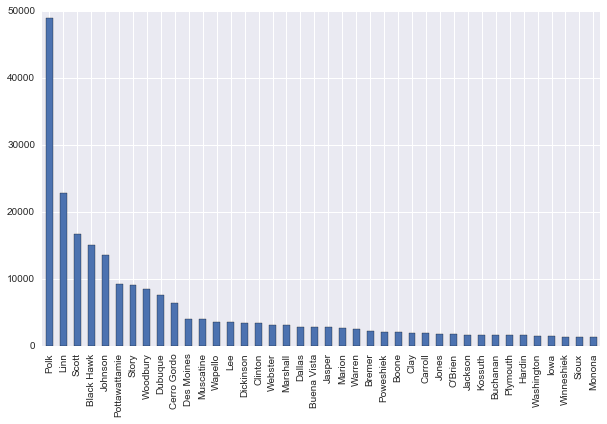

In [33]:
#Customer Transactions per County
TransactionsCounty = pd.value_counts(iowa['County'])
print TransactionsCounty.head(10)
TransactionsCounty.ix[:40].plot(kind='bar', figsize=(10, 6));

In [124]:
#copy original data for modification
storeData = iowa.copy(deep=True)

#filter data to just Polk County based on earlier analysis
storeData = storeData[ storeData['County'].str.contains("Polk")]

In [125]:
#remove all columns except 'Sale (Dollars)', 'Date', and 'Store Number', 
#which are common to our two needed tables
del storeData['City']
del storeData['Zip Code']
del storeData['Vendor Number']
del storeData['Item Number']
del storeData['Bottle Volume (ml)']
del storeData['State Bottle Cost']
del storeData['State Bottle Retail']
del storeData['Bottles Sold']
del storeData['Volume Sold (Liters)']
del storeData['Category Name']
del storeData['Item Description']
del storeData['County']


In [126]:
#Create temporary columns to group Date into Period Numbers, where period numbers increase by one 
# from one period to the next, regardless of the annual cycle of years and months
# Period number will be easier to use as an independant variable for forecasting future values
storeData['Period'] = pd.to_datetime( storeData['Date'] )
storeData['quarter'] = storeData['Period'].dt.quarter
storeData['year'] = storeData['Period'].dt.year

# Calculate PeriodNum based on temporary columns
storeData['PeriodNum'] = (storeData['year']-2015)*4 + storeData['quarter']

#delete temporary columns and 'Date' column, which are no longer needed
del storeData['Date']
del storeData['Period']
del storeData['quarter']
del storeData['year']

In [144]:
#copy data frame into a new frame 
saleDollars = storeData.copy(deep=True)
saleDollars.head()

,Store Number,PeriodNum
0,4901,1
8,2548,2
27,2666,5
28,3762,1
29,2630,3


In [129]:
#delete from each data frame the column that is not needed, because it is used by the other
del storeData['Sale (Dollars)']
del saleDollars['Store Number']

In [130]:
#summary calculations, group the data into periods
storeDataCounts = storeData.groupby('PeriodNum')['Store Number'].nunique()
saleDollarsSum = saleDollars.groupby("PeriodNum").sum()

#Note: saleDollarsSum is still a DataFrame, but storeDataCounts is a Series
#Extract Series data from DataFrame by calling column reference in []
#When Series is divided by Series, the like index values are matched and then divided
avgPerStore = saleDollarsSum['Sale (Dollars)'] / storeDataCounts

In [164]:
#avgPerStore is the target dependant value for this analysis.
#independant values is the series of PeriodNumbers which are [1,2,3,4,5]
xs = pd.Series( [1, 2, 3, 4, 5])
#xs.shape
ys = avgPerStore
ys

0    7515.222406
1    8700.559738
2    7613.215882
3    9783.749785
4    7534.392151
dtype: float64

In [171]:
#change index from 1-5 to 0-4 to match xs indexing
ys.index = range(5)
ys.shape

(5,)

In [169]:
xs#.index = range(5)
xs
xs_s = pd.DataFrame(xs)
xs_s.shape

(5, 1)

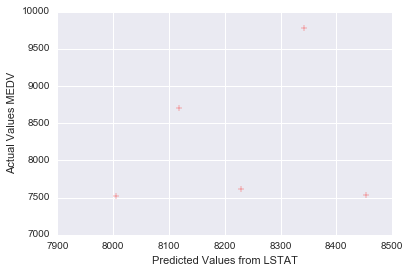

MSE: 776996.062403


In [170]:
from sklearn.metrics import mean_squared_error

lm = linear_model.LinearRegression()

X = xs_s
y = ys

model = lm.fit(X, y)
predictions = lm.predict(X)

# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [6]:
from sklearn import linear_model


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.